In [1]:
using PyPlot
using Seaborn

In [ ]:
include("src/NGSIM.jl")

In [5]:
td = load_trajdata(1)
(S, id_lookup) = td_sparse(td);

 31.834308 seconds (28.62 M allocations: 2.309 GB, 2.96% gc time)


Trajdata(9536 frames)

## Sparsity of Data

Artifacts are from (Seaborn's) plotting

Also, ~300 is enough for two trajectories to be seperated in time?  
Maybe?

In [52]:
S_i = similar(S, Float64)
S_i.nzval[:] = 16
;

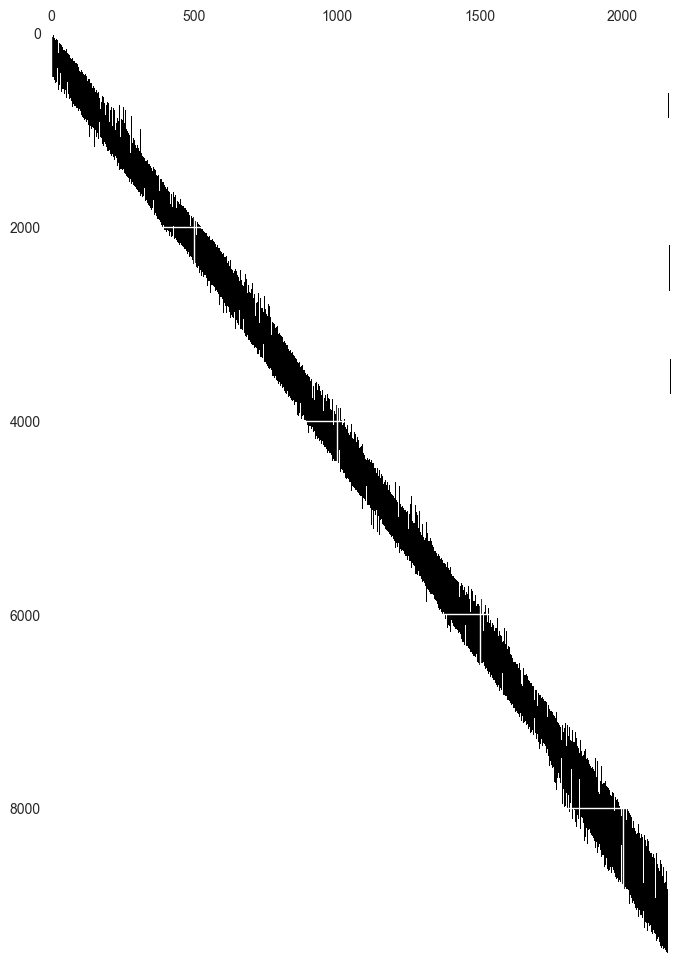

PyObject <matplotlib.image.AxesImage object at 0x000000002EA98240>

In [69]:
fig = figure(figsize=(8, 12))
ax = fig[:gca]()
ax[:spy](S_i, aspect="auto")

## Extract Traj Data

In [18]:
trajs_xy = map_traj(S, (s::VehicleState) -> s.posG.x, (s::VehicleState) -> s.posG.y)
;

In [19]:
fs = [(s::VehicleState) -> s.v,
      (s::VehicleState) -> s.posF.s,
      (s::VehicleState) -> s.posF.t,
      (s::VehicleState) -> s.posF.ϕ,
      (s::VehicleState) -> s.posF.roadind.tag.lane,
      (s::VehicleState) -> s.posF.roadind.tag.segment]
trajs = map_traj(S, fs...)
;

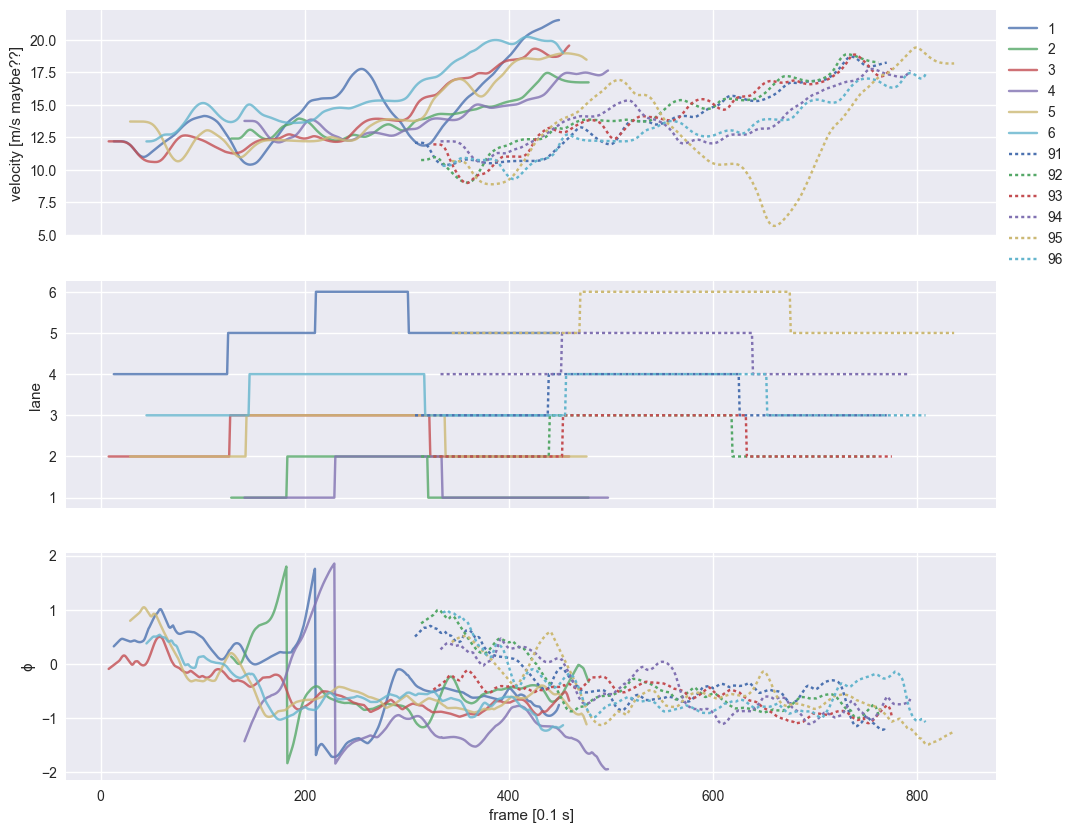

PyObject <matplotlib.legend.Legend object at 0x000000000211C710>

In [20]:
(fig, axs) = subplots(3, 1, figsize=(12, 10), sharex=true)

for id in 1:6
    traj = trajs[id]
    axs[1][:plot](traj[:, 1], traj[:, 2], label=id, alpha=0.8)
    axs[2][:plot](traj[:, 1], traj[:, 6], label=id, alpha=0.8)
    axs[3][:plot](traj[:, 1], traj[:, 4], label=id, alpha=0.8)
end

for id in 90 + (1:6)
    traj = trajs[id]
    axs[1][:plot](traj[:, 1], traj[:, 2], ":", label=id)
    axs[2][:plot](traj[:, 1], traj[:, 6], ":", label=id)
    axs[3][:plot](traj[:, 1], traj[:, 4], ":", label=id)
end

axs[1][:set_ylabel]("velocity [m/s maybe??]")
axs[2][:set_ylabel]("lane")
axs[3][:set_ylabel]("ϕ")
axs[end][:set_xlabel]("frame [0.1 s]")
axs[1][:legend](loc=2, bbox_to_anchor=(1,1))

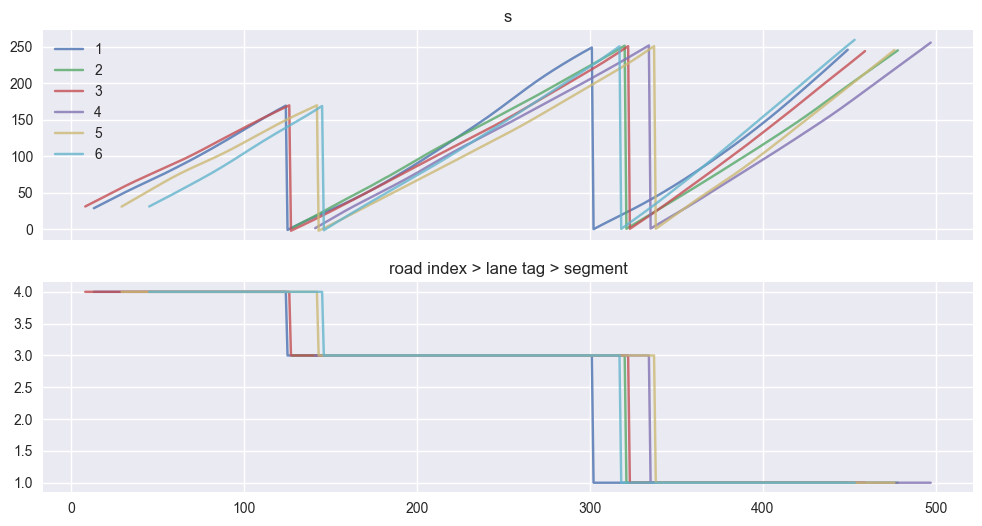

PyObject <matplotlib.legend.Legend object at 0x00000000026E17F0>

In [21]:
(fig, axs) = subplots(2, 1, figsize=(12, 6), sharex=true)

for id in 1:6
    traj = trajs[id]
    axs[1][:plot](traj[:, 1], traj[:, 3], label=id, alpha=0.8)
    axs[2][:plot](traj[:, 1], traj[:, 7], label=id, alpha=0.8)
end

axs[1][:set_title]("s")
axs[2][:set_title]("road index > lane tag > segment")
axs[1][:legend]()

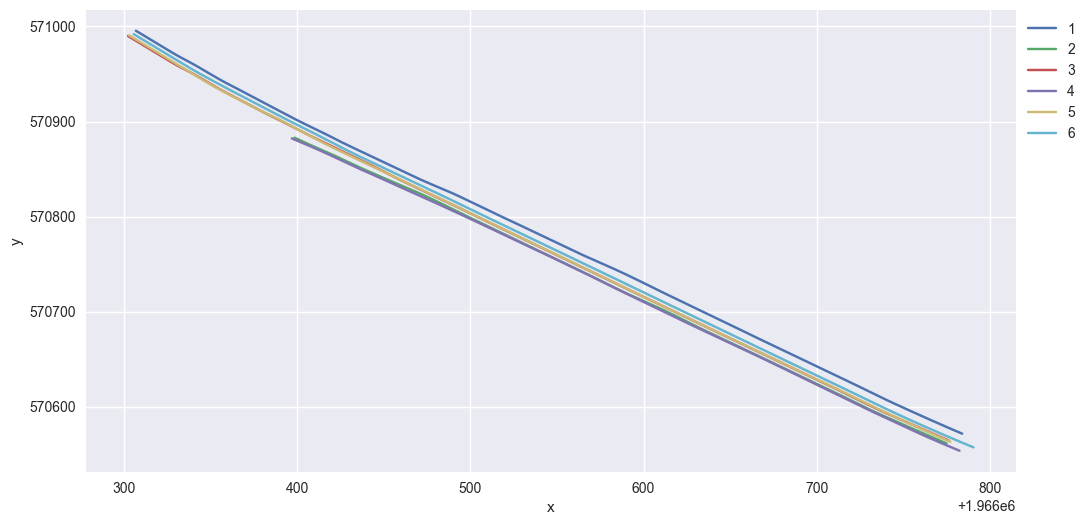

PyObject <matplotlib.legend.Legend object at 0x0000000030042198>

In [22]:
fig = figure(figsize=(12, 6))
ax = fig[:gca]()

for id in 1:6
    traj = trajs_xy[id]
    ax[:plot](traj[:, 2], traj[:, 3], label=id)
end

ax[:set_xlabel]("x")
ax[:set_ylabel]("y")
ax[:legend](loc=2, bbox_to_anchor=(1,1))

In [ ]:
vs = map(s -> s.v, S.nzval)

In [ ]:
distplot(vs, kde_kws=Dict("bw"=>0.5))